<img align="left" src = https://project.lsst.org/sites/default/files/Rubin-O-Logo_0.png width=250 style="padding: 10px"
alt="Rubin Observatory logo, a graphical representation of turning stars into data."> <br><br>
**Description:** Create a polar plot showing examples of tract locations near the celestial south pole.<br>
**Authors:** James Mullaney <br>
**Last verified to run:** 2025-05-29 <br>
**LSST Science Pipelines version:** v29.0.1<br>
**Container size:** large <br>

## Set up

In [1]:
# Plotting modules
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.patches as patches

# LSST Science Pipelines 
from lsst.daf.butler import Butler
from lsst.geom import Box2D
from lsst.analysis.tools.utils import getTractCorners, getPatchCorners

## A utility function to generate a plot path from a series of corners

In [3]:
def buildPath(corners):

    cornersInDegrees = [(corner[0].asDegrees()%360 - 180, corner[1].asDegrees()) for corner in corners]
    cornersInDegrees.append(cornersInDegrees[0])

    return mpath.Path(cornersInDegrees)

## Set up a butler instance and retrieve the skymap

In [2]:
instrument = 'LSSTComCam'
collections = ['LSSTComCam/DP1/defaults', 
               'LSSTComCam/runs/DRP/DP1/v29_0_0/DM-50260',
               'skymaps', ]
skymapName = 'lsst_cells_v1'
butler = Butler("/repo/dp1",
                instrument=instrument, 
                collections=collections, 
                skymap=skymapName)
registry = butler.registry
skymap = butler.get('skyMap', skymap=skymapName)

## Generate the plot

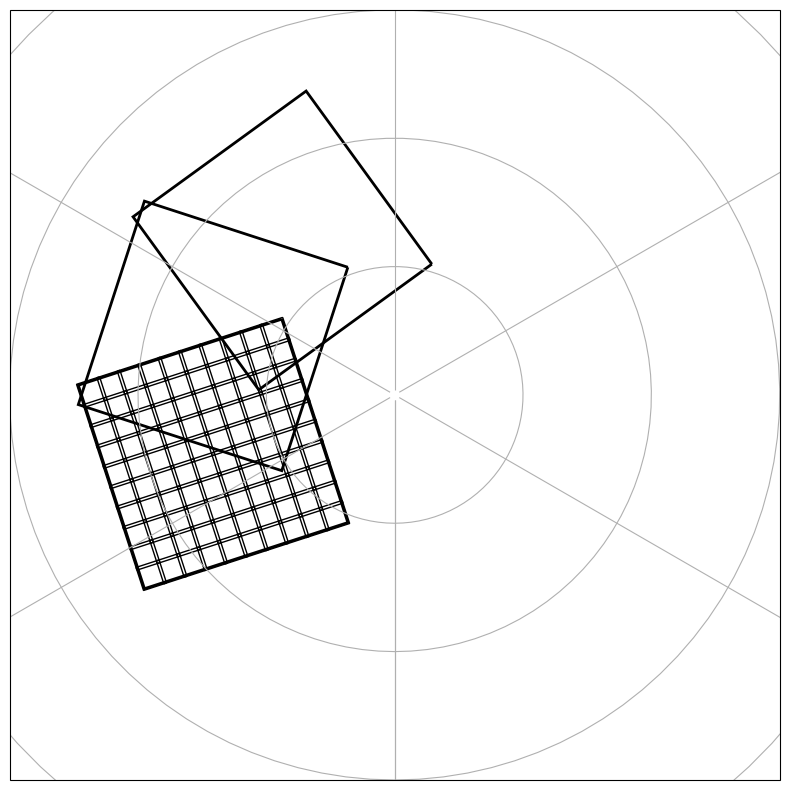

In [15]:
fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())
ax.set_extent([-180, 180, -90, -87], ccrs.PlateCarree())
ax.gridlines()

# Plot the boundary of a tract near the southern pole:
tract = skymap.generateTract(3)
tractPath = buildPath(tract.getVertexList())
tractOutline = patches.PathPatch(tractPath, facecolor='none', lw=2, transform=ccrs.PlateCarree())
ax.add_patch(tractOutline)

# Plot patch locations - including overlap - within the first tract.
nPatches = tract.getNumPatches().x * tract.getNumPatches().y
for patchId in range(nPatches):
    patch = tract.getPatchInfo(patchId)
    patchPath = buildPath(tract.getWcs().pixelToSky(Box2D(patch.getOuterBBox()).getCorners()))
    patchOutline = patches.PathPatch(patchPath, facecolor='none', lw=1, transform=ccrs.PlateCarree())
    ax.add_patch(patchOutline)

# Plot the boundaries of two further tracts to demonstrate the level of overlap between tracts near the poles.
tract = skymap.generateTract(4)
tractPath = buildPath(tract.getVertexList())
tractOutline = patches.PathPatch(tractPath, facecolor='none', lw=2, transform=ccrs.PlateCarree())
ax.add_patch(tractOutline)

tract = skymap.generateTract(5)
tractPath = buildPath(tract.getVertexList())
tractOutline = patches.PathPatch(tractPath, facecolor='none', lw=2, transform=ccrs.PlateCarree())
ax.add_patch(tractOutline)

fig.show()

In [13]:
npatch = tract.getNumPatches().x * tract.getNumPatches().y

In [14]:
npatch

100